# Auto Insurance Analysis

## Technical Notebook

## Project Goals

- Analyze auto insurance data.
- Build a logistic regression model to predict crash probability for auto insurance customers.
- Build a linear regression model to predict crash cost for auto insurance customers.
- Use model results to develop crash percentage, assign customers to new risk profiles, and risk probability percentages.
- Determine cost of premiums based on customer risk profiles and risk probability percentages.

## Summary of Data

The dataset for this project contains 6044 records of auto insurance data. Each record
represents a customer at an auto insurance company. Using this data, we will be able to ascertain what
influences the likelihood of a car crash. Then subsequently, we will be able to determine the cost to resolve a claim. The data in this project is the typical type of corporate data you would receive from a company in the insurance field-- a typical flat file from client records.

### Library Import

In [1]:
#Import libraries
%run ../python_files/imports

### Data Import

In [2]:
#Import cleaned data from our exploratory data analysis
%run ../python_files/auto_insurance_eda

## Modeling

### Logistic Regression Model

Here, we are building a logistic regression model to predict crash probability for auto insurance customers.

##### Model Implementation

Our logistic regression model using our training data initially shows some good signs. We check the negative coefficients of some of the feature variables and see that they are all very close to 0, meaning we do not need to remove any variables due to that. We also see that the p-values of our feature variables show no red flags and are also very close to 0, meaning we do not need to remove any variables due to that. The final observation that we see is that 'urbanicity' was the feature variable with the strongest predictive power over our response variable, 'crash'.

In [3]:
logit_model = sm.Logit(y_train_log, x_train_log)
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.456787
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  crash   No. Observations:                 4835
Model:                          Logit   Df Residuals:                     4819
Method:                           MLE   Df Model:                           15
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.2111
Time:                        10:42:34   Log-Likelihood:                -2208.6
converged:                       True   LL-Null:                       -2799.5
Covariance Type:            nonrobust   LLR p-value:                1.285e-242
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
kidsdriv         0.3073      0.070      4.404      0.000       0.171       0.444
parent1          0.3918

##### Model Fitting

We use our model from above, which was built on the training data set, to test against our test data set below. This will help us evaluate the model performance of our logistic regression model.

In [4]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train_log, y_train_log)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predicting Test Set Results and Calculating Accuracy

Below, we use several metrics to evaluate the model performance of our logistic regression model, including the calculation of accuracy, a confusion matrix, a classification report, and a plot of a ROC curve. These performance evaluation techniques evaluate the training dataset against the test data set.

In [5]:
y_pred_log = logreg_model.predict(x_test_log)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_model.score(x_test_log, y_test_log)))

Accuracy of logistic regression classifier on test set: 0.78


Through the calculation of the accuracy, 78% of the variability in 'crash' can be explained using our feature variables, which is promising.

##### Confusion Matrix

The below confusion matrix results are telling us that we have 946 (830 + 116 = 946) correct predictions and 263 (200 + 63 = 263) incorrect predictions. The ratio of approximately 3.6 correct predictions to every 1 incorrect predictions is a good sign.

In [6]:
confusion_matrix = confusion_matrix(y_test_log, y_pred_log)
print(confusion_matrix)

[[831  62]
 [199 117]]


##### Interpretation of Results

The below classification report and ROC curve further display the accuracy of our model against the test set and the number of correct predictions vs incorrect predictions.

In [7]:
print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       893
           1       0.65      0.37      0.47       316

    accuracy                           0.78      1209
   macro avg       0.73      0.65      0.67      1209
weighted avg       0.77      0.78      0.76      1209



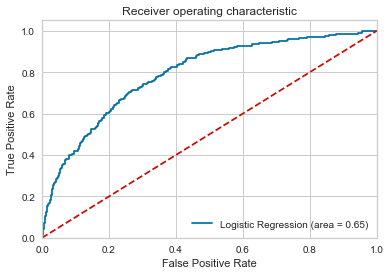

In [8]:
# ROC Curve

logit_roc_auc = roc_auc_score(y_test_log, logreg_model.predict(x_test_log))
fpr, tpr, thresholds = roc_curve(y_test_log, logreg_model.predict_proba(x_test_log)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Linear Regression Model

Here, we are building a simple linear regression model to predict crash cost for auto insurance customers.

##### Model Implementation

Our simple linear regression model is showing many red flags. First, the r-squared value of 0.153 shows that this model only explains approximately 15% of the variability in this model, in relation to our response variable 'crash_cost'. Our adjusted r-squared value is also similarly low at 0.149, indicating that this model is very inaccurate. Next, we can closely examine our feature variables and observe issues there as well. 8 of our feature variables (mstatus, sex, education, job, car_type, red_car, car_age, tif_log) have extreme negative coefficients that are very far away from a value of 0, indicating they are hurting model performance by being included in this model. We also see that 8 of our feature variables (age, homekids, yoj, sex, job, car_type, oldclaim, bluebook_log) have very high p-values that are also not close to a value of 0, indicating they are also hurting our model perofrmance by being included in this model. We will further examine model performance below.

In [9]:
linear_model = sm.OLS(y_train_lin, x_train_lin)
linear_result = linear_model.fit()
print(linear_result.summary())

                                 OLS Regression Results                                
Dep. Variable:             crash_cost   R-squared (uncentered):                   0.394
Model:                            OLS   Adj. R-squared (uncentered):              0.393
Method:                 Least Squares   F-statistic:                              829.9
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                   4.53e-141
Time:                        10:42:35   Log-Likelihood:                         -13081.
No. Observations:                1280   AIC:                                  2.616e+04
Df Residuals:                    1279   BIC:                                  2.617e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

##### Model Fitting

We use our model from above, which was built on the training data set, to test against our test data set below. This will help us evaluate the model performance of our simple linear regression model.

In [10]:
linreg_model = LinearRegression()
linreg_model.fit(x_train_lin, y_train_lin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Model Results

Below, we use several metrics to evaluate the model performance of our simple linear regression model, including the calculation of r-squared value, the calculation of root mean squared error (RMSE) value, the calculation of mean absolute error value (MAE), and a plot of the model residuals. These performance evaluation techniques evaluate the training dataset against the test data set.

In [11]:
#Calculate r-squared value

y_pred_lin = linreg_model.predict(x_test_lin)
print('Linear Regression R squared": %.4f' % linreg_model.score(x_test_lin, y_test_lin))

Linear Regression R squared": 0.0009


Through the calculation of the r-squared value, only approximately 1% of the variability in crash_cost can be explained using our feature variables, which is very low.

In [12]:
#Calculate root mean squared error (RMSE) value

mse_lin = mean_squared_error(y_pred_lin, y_test_lin)
rmse_lin = np.sqrt(mse_lin)
print('Linear Regression RMSE: %.4f' % rmse_lin)

Linear Regression RMSE: 9867.4391


Through the calculation of root mean squared error (RMSE), our model was able to predict that the value of every crash in the test set was within approximately $9867 of the real price.

In [13]:
#Calculate mean absolute error (MAE) value

mae_lin = mean_absolute_error(y_pred_lin, y_test_lin)
print('Linear Regression MAE: %.4f' % mae_lin)

Linear Regression MAE: 4341.1846


The calculation of mean absolute error (MAE) was also concerning.

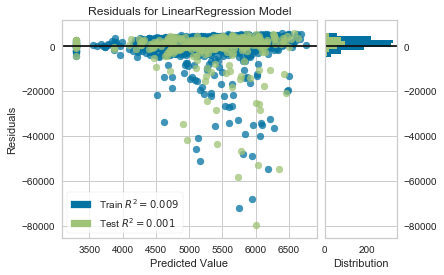

In [14]:
#Plot of Residuals

visualizer = ResidualsPlot(linreg_model)
visualizer.fit(x_train_lin, y_train_lin)  # Fit the training data to the visualizer
visualizer.score(x_test_lin, y_test_lin)  # Evaluate the model on the test data
visualizer.show()                         # Finalize and render the plot of residuals

The above plot of the model residuals shows a bad relationship between predicted and actual values, which also proves that our model is not accurate.

## Results and Conclusions

Overall, we can conclude that our logistic regression model performed reaonsably well and is a good predictor of our 'crash' response variable. On the other hand, our simple linear regression model performed very poorly and is a bad predictor of our 'crash_cost' response variable. In future work, we can certainly make improvements to each model and consider whether to use more or less feature variables, or use other modeling techniques to improve performance.

From here, we are able to use to modeling results of our logistic regression model to approxmiate crash percentage. With that, we can build risk profiles for our entire customer base and decide which are risky vs not risky drivers. With customer risk profiles, we can them assign customers a risk probability percentage that determines the likelihood that they get into a future crash. Lastly, using customer risk profiles and customer risk probability percentages, we can determine the cost of premiums for each of our customers.

For further analysis, please review our 'presentation slides' located at the following link: https://prezi.com/view/1bE0LMc8xoJqwupO7EOy/